# Final Ranking Notebook

This notebook details the process of weighing the three metrics to produce a final ranking. The metrics and their corresponding weights are:
1. Revenue (including Fraud) Metric - 50%
2. Demographic Metric - 25%
3. Brand Exposure and Growth Metric - 25%

The weight is given to reflect both backward and forward-looking insights. We consider the transactions of each merchant reflect their past success and customer engagement and the revenue works as a key indicator of their ability to attract and retain customers. In addition to the present performance, we predict the future prospects of the merchant using the demographic composition of the merchant's customer base, identifying whether they cater to a diverse and growing market and whether the merchant is positioned to capitalize on future opportunities. 

In [1]:
# import required libraries and constants
import sys
sys.path.append('../scripts/utils')
from constants import *
from custom_functions import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define constants (weights and categories)

REVENUE_WEIGHT = 0.5
EXTERNAL_WEIGHT = 0.25
BRAND_WEIGHT = 0.25

CATEGORIES = ['technology', 'leisure luxury art', 'health wellness', 'repair services', 'appliances']

In [3]:
# read our ranking from individual metrics
revenue = pd.read_pickle(f"{ANALYSIS_DATA}revenue_fraud_ranking.pkl")
external = pd.read_pickle(f"{ANALYSIS_DATA}external_data_ranking.pkl")
brand = pd.read_pickle(f"{ANALYSIS_DATA}brand_exposure_ranking.pkl")

# read merchant data for ranking per segment
merchant = pd.read_pickle(f"{CURATED_DATA}tbl_merchants_cluster.pkl")

In [4]:
# extract the rank only
revenue_new = revenue[["merchant_abn", "rank"]]
revenue_new = revenue_new.rename(columns={'rank': 'revenue_metric'})
external_new = external[["merchant_abn", "rank"]]
external_new = external_new.rename(columns={'rank': 'external_metric'})
brand_new = brand[["merchant_abn", "rank"]]
brand_new = brand_new.rename(columns={'rank': 'brand_metric'})

In [5]:
# join the dataframes
ranking_df = pd.merge(revenue_new, external_new, on='merchant_abn')
ranking_df = pd.merge(ranking_df, brand_new, on='merchant_abn')
ranking_df

,merchant_abn,revenue_metric,external_metric,brand_metric
0,35344855546,2171.0,3219,1158
1,83412691377,1257.0,1349,195
2,15613631617,2760.0,2509,1091
3,38700038932,5.0,1317,394
4,48214071373,1867.0,3216,1772
...,...,...,...,...
4017,99420575685,2520.0,104,3789
4018,93915598279,3659.0,3929,3986
4019,34205660775,2420.0,1,3983
4020,11411018019,3815.0,26,3863


## Rank Top 100 Merchants
Now, we will use the combined dataframe to rank our top 100 merchants based on the specified weights.

In [6]:
# perform weighted ranking
ranking_df["final_metric"] = REVENUE_WEIGHT*ranking_df["revenue_metric"] + EXTERNAL_WEIGHT*ranking_df["external_metric"] + \
    BRAND_WEIGHT*ranking_df["brand_metric"]
ranking_df = ranking_df.sort_values(by='final_metric')
ranking_df['rank'] = range(1, len(ranking_df) + 1)
ranking_df = ranking_df.sort_values(by='merchant_abn')
ranking_df = ranking_df.reset_index(drop=True)

# get category and name of each merchant
merchant = merchant[["name", "merchant_abn", "cluster"]]
ranking_df = ranking_df.merge(merchant, on="merchant_abn")

# save to analysis layer
ranking_df.to_pickle(f"{ANALYSIS_DATA}final_rank.pkl")

ranking_df

,merchant_abn,revenue_metric,external_metric,brand_metric,final_metric,rank,name,cluster
0,10023283211,3156.0,3004,763,2519.75,2763,Felis Limited,appliances
1,10142254217,2027.0,2491,794,1834.75,1759,Arcu Ac Orci Corporation,appliances
2,10165489824,2500.0,76,3957,2258.25,2377,Nunc Sed Company,appliances
3,10187291046,3123.0,3112,2171,2882.25,3333,Ultricies Dignissim Lacus Foundation,appliances
4,10192359162,1449.0,566,2066,1382.50,1169,Enim Condimentum PC,leisure luxury art
...,...,...,...,...,...,...,...,...
4017,99938978285,984.0,2060,148,1044.00,678,Elit Dictum Eu Ltd,appliances
4018,99974311662,3186.0,3685,2807,3216.00,3618,Mollis LLP,leisure luxury art
4019,99976658299,75.0,2055,100,576.25,100,Sociosqu Corp.,appliances
4020,99987905597,2061.0,1140,2558,1955.00,1933,Commodo Hendrerit LLC,appliances


### Top 100 Merchants

In [7]:
# extract top 100 merchants

top_100 = (ranking_df[ranking_df['rank'] <= 100].sort_values(by='rank'))[["merchant_abn", "rank", "name", "cluster"]]
ranking_df.to_pickle(f"{ANALYSIS_DATA}top_100.pkl")
top_100

,merchant_abn,rank,name,cluster
1399,40515428545,1,Elit Sed Consequat Associates,leisure luxury art
1300,38090089066,2,Interdum Feugiat Sed Inc.,appliances
1328,38700038932,3,Etiam Bibendum Industries,appliances
1937,52594457116,4,Vel Turpis Aliquam Company,repair services
3943,98072939449,5,Mattis Velit Justo Ltd,leisure luxury art
...,...,...,...,...
906,29625244690,96,Id Enim Inc.,leisure luxury art
2936,75034515922,97,Ac Eleifend Corp.,leisure luxury art
3365,84703983173,98,Amet Consulting,technology
3749,93558142492,99,Dolor Quisque Inc.,appliances


### Distribution of Top 100 Merchant Categories

We observe that a large portion of the top 100 merchants belong to the Appliances sector, followed by the Leisure, Luxury and Art sector, Technology sector, Repair Services, and lastly, Health and Wellness sector. The distribution of the Top 100 Merchants is somewhat consistent with the distribution of the number of merchants.

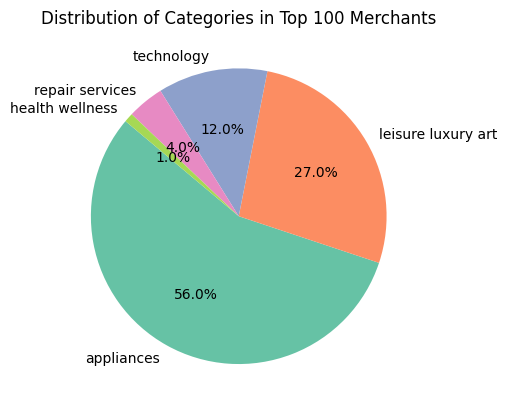

In [8]:
category_counts = top_100['cluster'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Categories in Top 100 Merchants')
plt.savefig(f"{RANKING}top100_merchants.jpg", dpi=300, bbox_inches="tight")
plt.show()

## Rank Top 10 Merchants per Category
Now, we rank the top 10 merchants for each category.

In [9]:
# extract top 10 of each category
top_10 = {category: (ranking_df[ranking_df['cluster'] == category]).sort_values(by="rank").head(10) for category in CATEGORIES}

In [10]:
top_10["technology"][["merchant_abn", "rank", "name", "cluster"]]

,merchant_abn,rank,name,cluster
1609,45244796758,14,Vitae Dolor LLP,technology
1622,45433476494,24,Adipiscing Elit Foundation,technology
1430,41271931352,26,Ac Sem Ut Company,technology
2190,58454491168,31,Diam At Foundation,technology
1119,34096466752,37,Nullam Enim Ltd,technology
2616,68216911708,61,Placerat Eget Venenatis Limited,technology
1213,35909341340,67,Arcu Sed Eu Incorporated,technology
3798,94690988633,69,Eu Placerat LLC,technology
3042,77338620996,71,Fames Ac Turpis LLC,technology
2458,64732735902,80,Imperdiet Non Vestibulum Institute,technology


In [11]:
top_10["leisure luxury art"][["merchant_abn", "rank", "name", "cluster"]]

,merchant_abn,rank,name,cluster
1399,40515428545,1,Elit Sed Consequat Associates,leisure luxury art
3943,98072939449,5,Mattis Velit Justo Ltd,leisure luxury art
3979,98973094975,7,Ornare Fusce Inc.,leisure luxury art
2443,64403598239,9,Lobortis Ultrices Company,leisure luxury art
2821,72738688428,11,Donec Tempor Corp.,leisure luxury art
3135,79417999332,17,Phasellus At Company,leisure luxury art
1655,46012371285,20,A Ultricies Inc.,leisure luxury art
3792,94493496784,32,Dictum Phasellus In Institute,leisure luxury art
1033,32361057556,33,Orci In Consequat Corporation,leisure luxury art
2290,60956456424,35,Ultricies Dignissim LLP,leisure luxury art


In [12]:
top_10["health wellness"][["merchant_abn", "rank", "name", "cluster"]]

,merchant_abn,rank,name,cluster
2846,73256306726,52,Id LLP,health wellness
1547,43650058736,108,Malesuada Consulting,health wellness
383,18303734841,115,Sollicitudin Orci Ltd,health wellness
3541,88699453206,174,Sed Nec Inc.,health wellness
378,18158387243,176,Nec Tellus Ltd,health wellness
645,24043105437,184,Enim Nec Tempus Institute,health wellness
1471,41980722395,205,Aliquet Nec PC,health wellness
1698,46953117138,207,Eu Accumsan Foundation,health wellness
1946,52794670013,216,Semper Pretium Corp.,health wellness
2909,74391255526,221,Vitae Semper Egestas Foundation,health wellness


In [13]:
top_10["repair services"][["merchant_abn", "rank", "name", "cluster"]]

,merchant_abn,rank,name,cluster
1937,52594457116,4,Vel Turpis Aliquam Company,repair services
1309,38337815814,30,Eget Venenatis Limited,repair services
2854,73489866331,41,Eu Dui Cum Company,repair services
2727,70620117107,85,Ante Vivamus Consulting,repair services
2989,76078244980,120,Nec Quam PC,repair services
3142,79633007926,127,Auctor Vitae Inc.,repair services
2003,54272781746,132,Non Massa Institute,repair services
2358,62583219931,146,Mi Lacinia Mattis Corporation,repair services
3014,76626119831,158,Tristique Pellentesque Inc.,repair services
2634,68559320474,188,Aliquam Auctor Associates,repair services


In [14]:
top_10["appliances"][["merchant_abn", "rank", "name", "cluster"]]

,merchant_abn,rank,name,cluster
1300,38090089066,2,Interdum Feugiat Sed Inc.,appliances
1328,38700038932,3,Etiam Bibendum Industries,appliances
2918,74589998324,6,Nec Inc.,appliances
3612,90578415511,8,A Scelerisque Foundation,appliances
535,21772962346,10,Purus Gravida Sagittis Ltd,appliances
2890,74063123996,12,Nec Eleifend Non Ltd,appliances
65,11439466003,13,Blandit At LLC,appliances
3833,95574756848,15,At Pede Inc.,appliances
561,22227727512,16,Malesuada Integer Id Foundation,appliances
3439,86578477987,18,Leo In Consulting,appliances


In [15]:
# save to analysis layer
for category in CATEGORIES:
    top_10[category][["merchant_abn", "rank", "name", "cluster"]].to_pickle(f"{ANALYSIS_DATA}{category}_top_10.pkl")

## Analysis on the Different Ranking Metrics
We wish to compare our ranking metrics and see how our rankings change when we incorporate a new metric into the ranking system.

In [16]:
ranking_df = ranking_df.rename(columns={'revenue_metric': 'revenue_rank', 'external_metric': 'demographic_rank', 'brand_metric': 'brand_rank'})

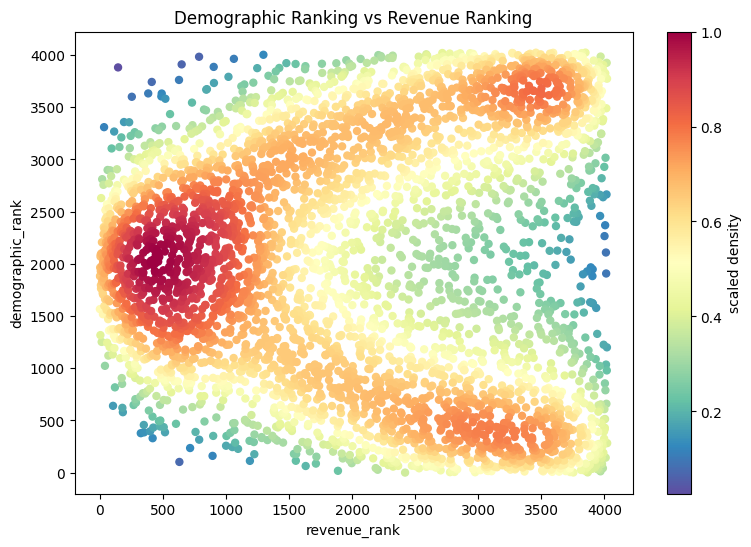

In [17]:
# compare ranking systems - demographic VS revenue rank
sc_plot = scatter_density(ranking_df, 'revenue_rank', 'demographic_rank', 'Demographic Ranking vs Revenue Ranking')
sc_plot.savefig(f'{RANKING}rank_compare1.png', bbox_inches='tight', dpi=300)

The plot of the demographic metric versus revenue ranking highlights a concentration of top-ranked merchants around mid-range demographics. This observation suggests that focusing on mid-range postcodes could be used as an approach to maximize revenue.

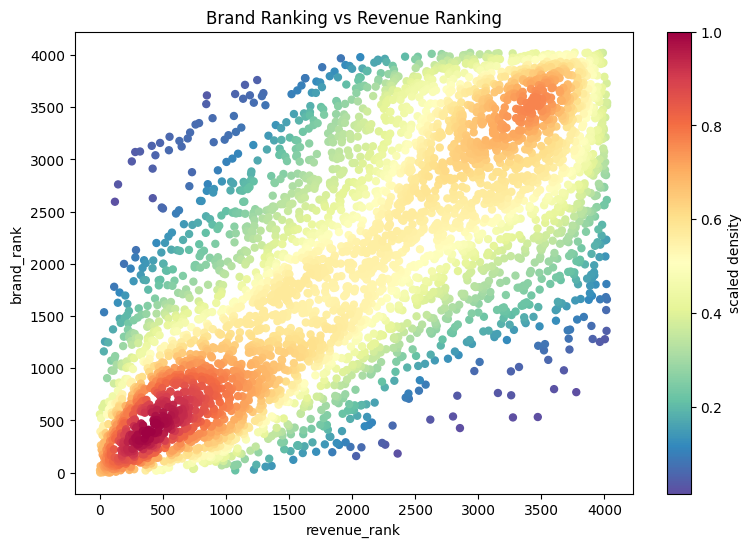

In [18]:
# compare ranking systems - brand VS revenue rank
sc_plot = scatter_density(ranking_df, 'revenue_rank', 'brand_rank', 'Brand Ranking vs Revenue Ranking')
sc_plot.savefig(f'{RANKING}rank_compare2.png', bbox_inches='tight', dpi=300)

The plot shows brand ranking versus revenue ranking which clearly demonstrates a correlation between the two metrics. This makes sense as  revenue is closely linked to the number of customers. Nevertheless, we made a decision to still include both metrics for our ranking system, recognizing the value in projecting growth through both customer acquisition and postcode coverage and allows us to consider multiple facets of success.